# Imports

In [1]:
import pandas as pd
from backtester import Backtester
from trader import Trader #put this file into Backtester folder
from datamodel import Listing
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'trader'

In [2]:
def get_prices(round: int, day: int):

    path = f"../../data/round{round}/prices_round_{round}_day_{day}.csv"
    return pd.read_csv(path, sep=";")


def get_trades(round: int, day: int):

    path = f"../../data/round{round}/trades_round_{round}_day_{day}.csv"
    return pd.read_csv(path, sep=";")

price_frames = []
trade_frames = []

for day in range(-2, 1):  

    prices = get_prices(1, day)
    trades = get_trades(1, day)
    price_frames.append(prices)
    trade_frames.append(trades)

prices = pd.concat(price_frames, ignore_index=True)
trades = pd.concat(trade_frames, ignore_index=True)



In [3]:
trader = Trader()
position_limit = {
    "RAINFOREST_RESIN": 50,
    "KELP": 50,
    "SQUID_INK": 50

}
listings = {
    "RAINFOREST_RESIN": Listing("RAINFOREST_RESIN", "RAINFOREST_RESIN", "SEASHELLS"),
    "KELP": Listing("KELP", "KELP", "SEASHELLS"),
    "SQUID_INK": Listing("SQUID_INK", "SQUID_INK", "SEASHELLS"),
}


fair_marks = {
    "KELP": lambda order_depth: trader.kelp_fair_value(order_depth, {}),
    "SQUID_INK": lambda order_depth: trader.squid_ink_fair_value(order_depth, {})
}

#prices = pd.read_csv("../../data/round1/prices_round_1_day_-2.csv", delimiter=';')
#trades = pd.read_csv("../../data/round1/trades_round_1_day_-2.csv", delimiter=';')


bt = Backtester(
    trader=trader,
    listings=listings,
    position_limit=position_limit,
    fair_marks=fair_marks,
    market_data=prices,  # your loaded pandas DataFrame
    trade_history=trades,  # your loaded pandas DataFrame
    file_name="../../data/tutorial/backtest_results.txt"
)

bt.run()

In [4]:
bt.pnl

{'RAINFOREST_RESIN': 32036.0, 'KELP': 4638.5, 'SQUID_INK': 12548.0}

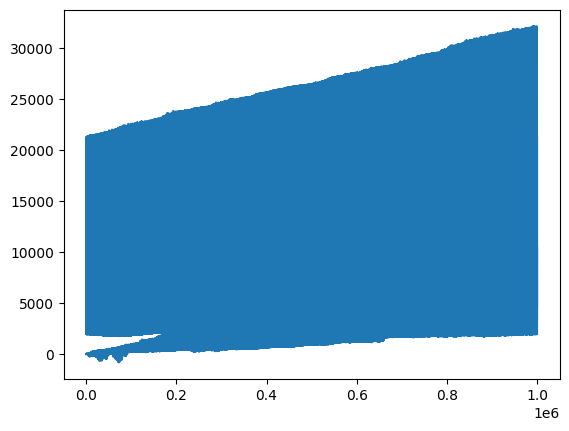

In [6]:
frame = bt.market_data
squid_df = frame[frame["product"] == "KELP"]
plt.plot(squid_df["timestamp"], squid_df["profit_and_loss"])

